# VGG16 - Faculty Drone

## Importing and defining model

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# model.summary()

In [ ]:
# from keras.preprocessing.image import load_img
# from keras.applications.imagenet_utils import preprocessing_input

# image = load_image('', target_size=(224,224))

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [ ]:
# Define the image size accepted by VGG16
IMAGE_SIZE = [224, 224]

# Define path to dataset if available
# train_path = 'path_to_train_dataset'
# valid_path = 'path_to_validation_dataset'

In [ ]:
# Load VGG16 without the head and include preprocessing
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Don't train existing weights
vgg.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/Final Year Project/AI/dataset_mini'

print(dataset_path)
# Useful for getting number of classes
folders = dataset_path
folders

'/content/drive/MyDrive/Final Year Project/AI/dataset'

In [ ]:
# Adding custom layers
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)  # Change for binary classification

# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# Model compilation for binary classification
model.compile(
  loss='binary_crossentropy',  # Change for binary classification
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# View the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 40,406,849 (154.14 MB)

 Trainable params: 25,692,161 (98.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Data preprocessing

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(dataset_path, image_size=(224,224))
data_iterator  = data.as_numpy_iterator()
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
print('max: ', batch[0].max())
print('min: ', batch[0].min())

Found 2270 files belonging to 2 classes.
max:  1.0
min:  0.0


In [ ]:
print(batch[1])

[1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1]


In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
train_size = int(len(data)*0.7)

# Used to evaulate the data while we train
val_size = int(len(data)*0.2)

# Not seen until the end of the training
test_size = int(len(data)*0.1)

print('First Iteration :', train_size, val_size, test_size)


addition_data = train_size+val_size+test_size
if addition_data == len(data):
  pass
else:
  additional = len(data) - addition_data
  test_size += additional

print('Second Iteration :', train_size, val_size, test_size)
print('Total Length = ', len(data))
print('Sum of length = ', (train_size + val_size + test_size))

First Iteration : 49 14 7
Second Iteration : 49 14 8
Total Length =  71
Sum of length =  71


In [ ]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)
print(train_data)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
# Assuming train_data, val_data, and test_data are already batched and preprocessed
# Configure the datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

## Training the model

In [ ]:
# Fit the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 90s 738ms/step - accuracy: 0.5324 - loss: 2.9222 - val_accuracy: 0.5335 - val_loss: 0.6252
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.6438 - loss: 0.6147 - val_accuracy: 0.8192 - val_loss: 0.5468
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.7552 - loss: 0.5360 - val_accuracy: 0.7902 - val_loss: 0.4831
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.8047 - loss: 0.4809 - val_accuracy: 0.8415 - val_loss: 0.4479
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.8253 - loss: 0.4314 - val_accuracy: 0.7612 - val_loss: 0.4179
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.8122 - loss: 0.4108 - val_accuracy: 0.8438 - val_loss: 0.3502
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.8515 - loss: 0.3595 - val_accuracy: 0.8594 - val_loss: 0.3248
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.8810 - loss: 0.3093 - val_accuracy: 

Implementing early stopping

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Set up early stopping
# early_stopping_monitor = EarlyStopping(
#     monitor='val_loss',
#     patience=5,  # Number of epochs with no improvement after which training will be stopped
#     verbose=1,
#     restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
# )

# # Fit the model with early stopping
# history = model.fit(
#     train_data,
#     validation_data=val_data,
#     epochs=100,  # Set a high number, early stopping will halt training once learning stagnates
#     callbacks=[early_stopping_monitor]
# )


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9489 - loss: 0.1350
Test accuracy: 0.9566929340362549, Test loss: 0.12866690754890442


## Plot Performance

In [ ]:
# Predictions
predictions = model.predict(test_data)
predictions = (predictions > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Get true labels from the test_data
true_labels = np.concatenate([y for x, y in test_data], axis=0)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step


In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[134   2]
 [  9 109]]


Confusion matrix, without normalization
Normalized confusion matrix


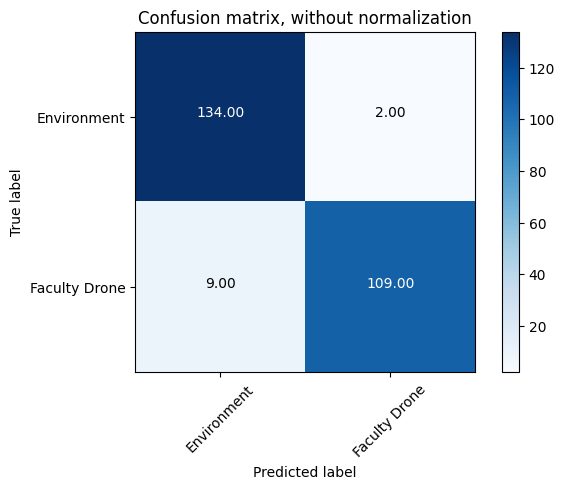

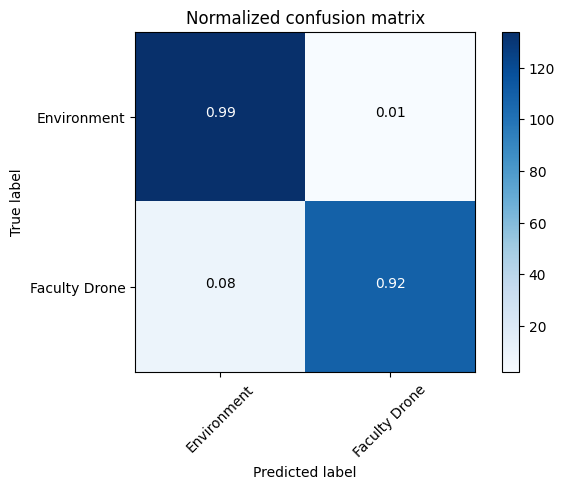

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming the confusion matrix 'cm' and class labels are already defined
# Example usage of the function
plt.figure()
plot_confusion_matrix(cm, classes=['Environment', 'Faculty Drone'], normalize=False,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cm, classes=['Environment', 'Faculty Drone'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=['Environment', 'Faculty Drone']))

Classification Report:
               precision    recall  f1-score   support

  Environment       0.94      0.99      0.96       136
Faculty Drone       0.98      0.92      0.95       118

     accuracy                           0.96       254
    macro avg       0.96      0.95      0.96       254
 weighted avg       0.96      0.96      0.96       254



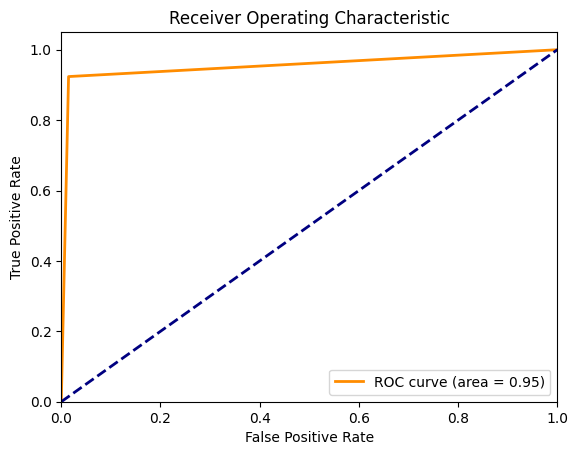

In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

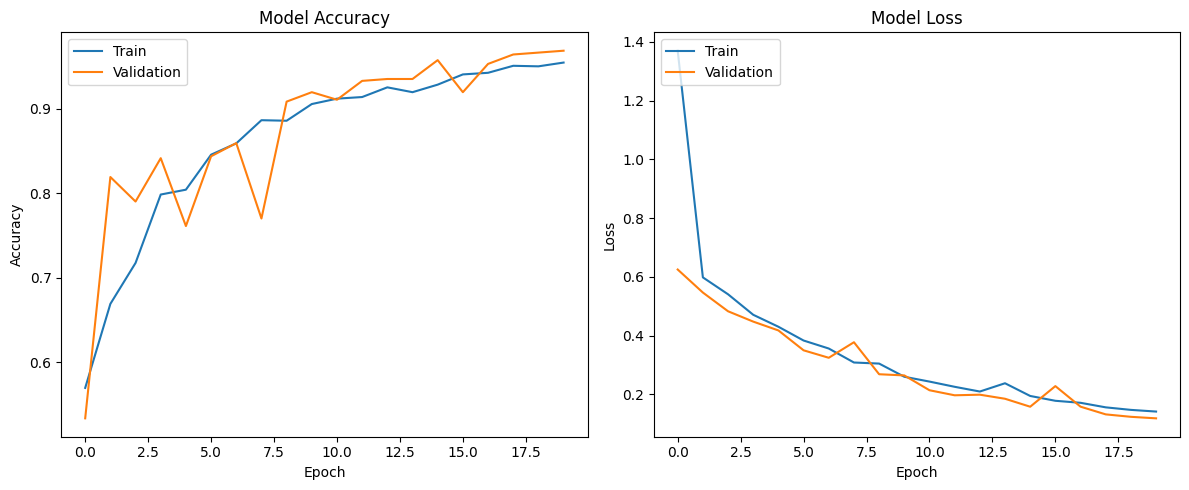

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the 'fit' method of your model
# It contains the history of training/validation loss and accuracy

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# Example: Assuming `full_dataset` is a TensorFlow Dataset containing all your data
# Let's say `dataset_size` is the number of examples in `full_dataset`
dataset_size = len(list(dataset_path))  # This is not efficient, preferably know this a priori
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
def create_model():
    base_model = VGG16(include_top=False, input_shape=IMAGE_SIZE + [3], weights='imagenet')
    base_model.trainable = False

    inputs = Input(shape=IMAGE_SIZE + [3])
    x = base_model(inputs, training=False)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, test_index in kf.split(np.arange(dataset_size)):
    # Generate train and test subsets for the current fold
    train_data = data.take(train_index.size).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    test_data = data.skip(train_index.size).take(test_index.size).cache().prefetch(buffer_size=AUTOTUNE)

    model_cross_val = create_model()

    print(f'Training fold {fold_no}...')
    history = model_cross_val.fit(train_data, epochs=20, validation_data=test_data)

    scores = model_cross_val.evaluate(test_data)
    print(f'Score for fold {fold_no}: {model_cross_val.metrics_names[0]} of {scores[0]}; {model_cross_val.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

print('Average scores for all folds:')
print(f'Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'Loss: {np.mean(loss_per_fold)}')


Training fold 1...
Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 640ms/step - accuracy: 0.5193 - loss: 2.3637 - val_accuracy: 0.5426 - val_loss: 0.6778
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.5736 - loss: 0.6653 - val_accuracy: 0.5426 - val_loss: 0.6557
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.5856 - loss: 0.6485 - val_accuracy: 0.7074 - val_loss: 0.6317
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.6635 - loss: 0.6200 - val_accuracy: 0.8381 - val_loss: 0.5817
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.7076 - loss: 0.5818 - val_accuracy: 0.7955 - val_loss: 0.5340
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.7092 - loss: 0.5418 - val_accuracy: 0.7500 - val_loss: 0.4933
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.8165 - loss: 0.4959 - val_accuracy: 0.8068 - val_loss: 0.4501
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.8265 - loss: 0.

### Viewing cross validation resuts

Plotting Accuracy and Loss for Each Fold

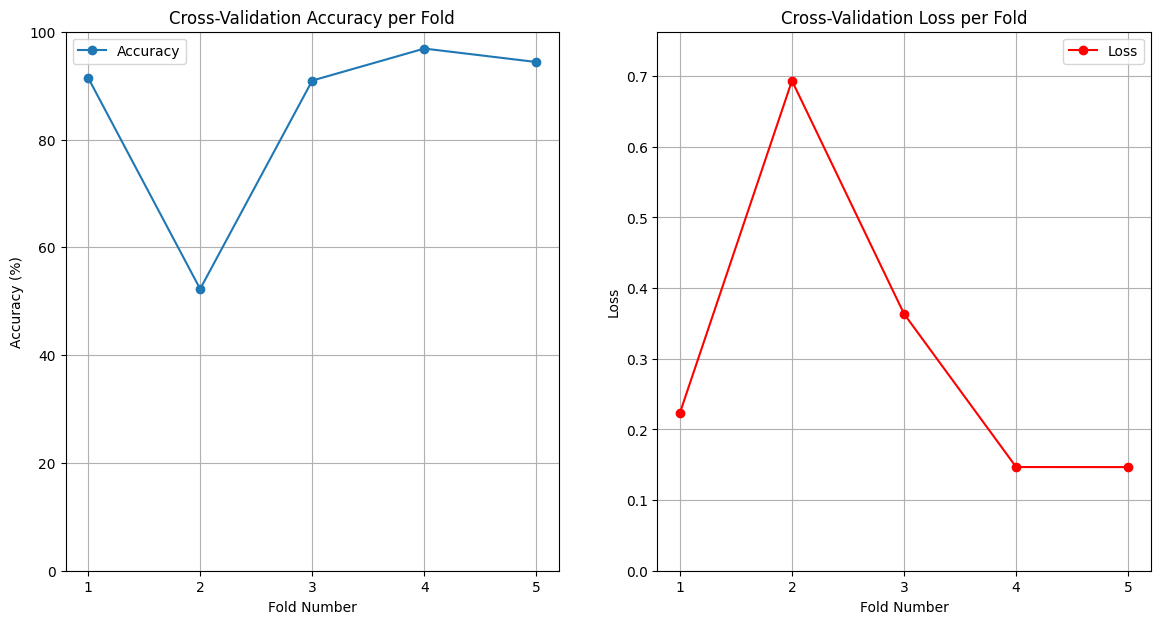

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming acc_per_fold and loss_per_fold are filled with the accuracy and loss data from each fold
fold_numbers = range(1, len(acc_per_fold) + 1)  # Fold numbers

plt.figure(figsize=(14, 7))

# Plotting accuracy per fold
plt.subplot(1, 2, 1)
plt.plot(fold_numbers, acc_per_fold, marker='o', label='Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.xticks(fold_numbers)
plt.ylim(0, 100)  # Set y-axis to start at 0 and end at 100%
plt.grid(True)
plt.legend()

# Plotting loss per fold
plt.subplot(1, 2, 2)
plt.plot(fold_numbers, loss_per_fold, marker='o', color='red', label='Loss')
plt.title('Cross-Validation Loss per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Loss')
plt.xticks(fold_numbers)
# Set an appropriate y-axis range for the loss values
plt.ylim(0, max(loss_per_fold) * 1.1)  # Adjust upper limit to 110% of the maximum value for better visualization
plt.grid(True)
plt.legend()

plt.show()


Boxplot for a Summary View

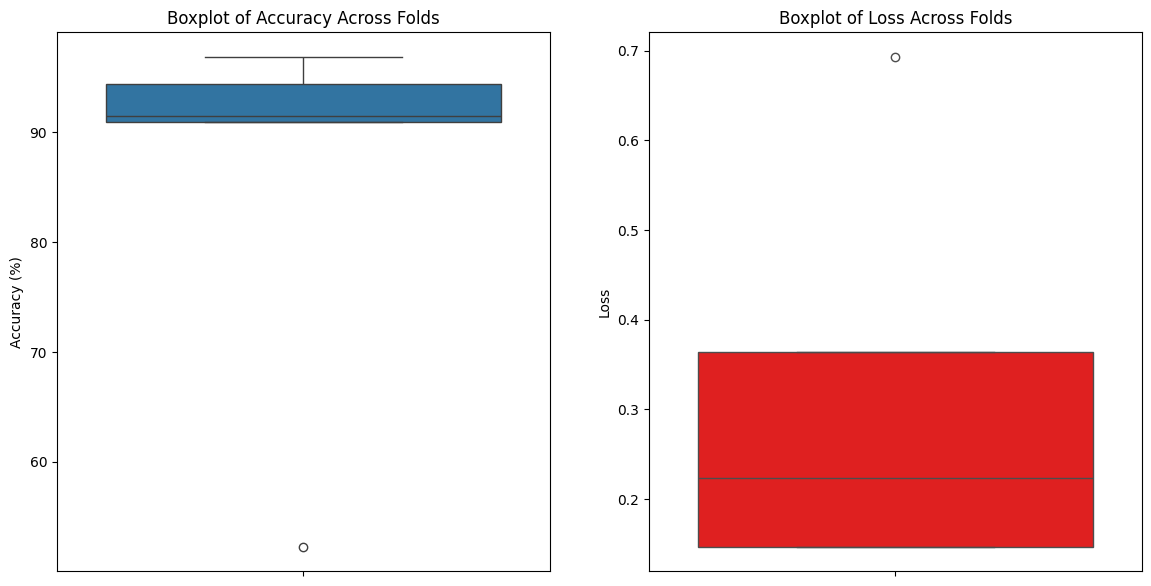

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 7))

# Plotting accuracy boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=acc_per_fold)
plt.title('Boxplot of Accuracy Across Folds')
plt.ylabel('Accuracy (%)')

# Plotting loss boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=loss_per_fold, color='red')
plt.title('Boxplot of Loss Across Folds')
plt.ylabel('Loss')

plt.show()

Histogram of Performance

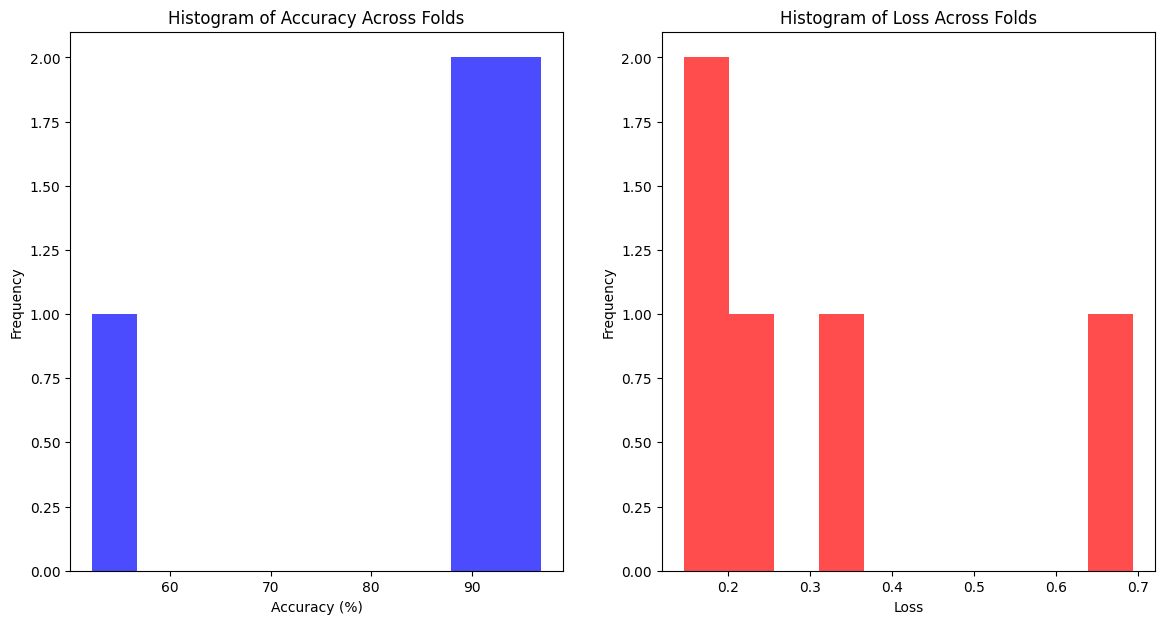

In [ ]:
plt.figure(figsize=(14, 7))

# Histogram of accuracy
plt.subplot(1, 2, 1)
plt.hist(acc_per_fold, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Accuracy Across Folds')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

# Histogram of loss
plt.subplot(1, 2, 2)
plt.hist(loss_per_fold, bins=10, color='red', alpha=0.7)
plt.title('Histogram of Loss Across Folds')
plt.xlabel('Loss')
plt.ylabel('Frequency')

plt.show()


Combined Scatter Plot

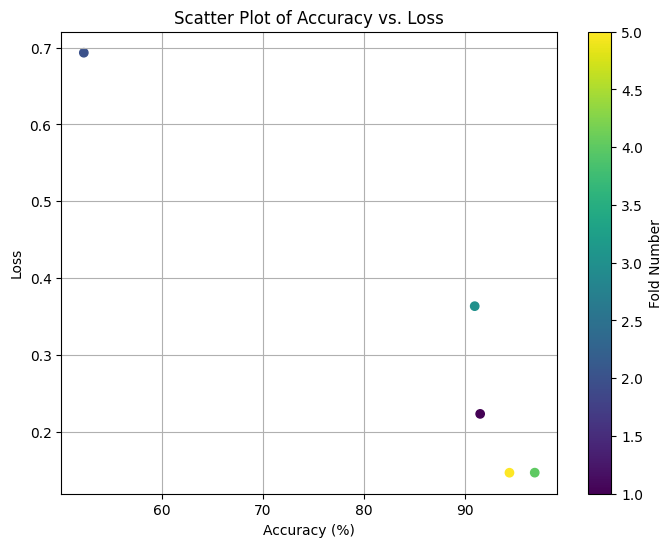

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(acc_per_fold, loss_per_fold, c=fold_numbers, cmap='viridis')
plt.colorbar(label='Fold Number')
plt.title('Scatter Plot of Accuracy vs. Loss')
plt.xlabel('Accuracy (%)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_model(trainable=True):
    vgg = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    vgg.trainable = trainable

    x = Flatten()(vgg.output)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)  # Add L2 regularization
    x = Dropout(0.5)(x)  # Add Dropout
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=vgg.input, outputs=predictions)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model